In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://covid.ourworldindata.org/data/internal/megafile--stringency.json"

In [3]:
response = requests.get(url)
data = response.json()

In [4]:
stringency_df = pd.DataFrame(data)

stringency_df.head()

,location,date,stringency_index,stringency_index_nonvac,stringency_index_vac,stringency_index_weighted_avg
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0


In [2]:
main_df = pd.read_csv("covid19-data.csv")

In [6]:
stringency_df.drop(stringency_df[['stringency_index_nonvac', 'stringency_index_vac', 'stringency_index_weighted_avg']], axis=1, inplace=True)

stringency_df.head()

,location,date,stringency_index
0,Afghanistan,2020-01-05,0.0
1,Afghanistan,2020-01-06,0.0
2,Afghanistan,2020-01-07,0.0
3,Afghanistan,2020-01-08,0.0
4,Afghanistan,2020-01-09,0.0


In [7]:
stringency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201592 entries, 0 to 201591
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          201592 non-null  object 
 1   date              201592 non-null  object 
 2   stringency_index  197292 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


In [8]:
# Get the stringency index for the countries at the end of 2020, (early start of 2021)

criteria = (stringency_df['date'] == "2021-01-01")

In [9]:
filtered_data = stringency_df.loc[criteria]

In [10]:
filtered_data.head()

,location,date,stringency_index
362,Afghanistan,2021-01-01,12.04
1454,Albania,2021-01-01,56.48
2546,Algeria,2021-01-01,72.22
3638,Andorra,2021-01-01,52.78
4730,Angola,2021-01-01,65.74


In [12]:
filtered_data['location'].sort_values()

362       Afghanistan
1454          Albania
2546          Algeria
3638          Andorra
4730           Angola
             ...     
196494      Venezuela
197586        Vietnam
198678          Yemen
199770         Zambia
200862       Zimbabwe
Name: location, Length: 184, dtype: object

In [13]:
filtered_data.shape

# This means we are missing 3 countries

(184, 3)

In [14]:
countries = list(stringency_df['location'].unique())

In [15]:
countries_in_main = list(main_df['Country'].unique())

In [16]:
print(len(countries))
print(len(countries_in_main))

185
187


In [17]:
missing_countries = set(countries_in_main) - set(countries)

In [18]:
missing_stringency = set(countries) - set(countries_in_main)

In [19]:
missing_stringency

{'Aruba',
 'Bermuda',
 'Cape Verde',
 'Congo',
 'Democratic Republic of Congo',
 'Faeroe Islands',
 'Guam',
 'Hong Kong',
 'Kiribati',
 'Macao',
 'Myanmar',
 'Palestine',
 'Puerto Rico',
 'Solomon Islands',
 'Taiwan',
 'Timor',
 'Tonga',
 'Turkmenistan',
 'United States',
 'United States Virgin Islands',
 'Vanuatu'}

In [20]:
missing_countries

{'Antigua and Barbuda',
 'Armenia',
 'Burma',
 'Cabo Verde',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Equatorial Guinea',
 'Grenada',
 'Guinea-Bissau',
 'Holy See',
 'Maldives',
 'Montenegro',
 'North Macedonia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Taiwan*',
 'Timor-Leste',
 'US',
 'West Bank and Gaza',
 'Western Sahara'}

In [24]:
countries_in_main = main_df['Country'].unique()
countries = stringency_df['location'].unique()

missing_in_stringency = set(countries_in_main) - set(countries)
missing_in_main = set(countries) - set(countries_in_main)

print(f"Countries in main dataset but not in stringency index dataset after mapping: {missing_in_stringency}")
print(f"Countries in stringency index dataset but not in main dataset after mapping: {missing_in_main}")

Countries in main dataset but not in stringency index dataset after mapping: {'North Macedonia', 'Grenada', 'Guinea-Bissau', 'Equatorial Guinea', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Saint Vincent and the Grenadines', 'West Bank and Gaza', 'Sao Tome and Principe', 'Taiwan*', 'Timor-Leste', 'Western Sahara', 'Antigua and Barbuda', 'Comoros', 'Cabo Verde', 'Saint Lucia', 'Saint Kitts and Nevis', 'Armenia', 'Burma', 'Montenegro', 'US', 'Maldives', 'Holy See'}
Countries in stringency index dataset but not in main dataset after mapping: {'Aruba', 'Kiribati', 'Cape Verde', 'Hong Kong', 'Solomon Islands', 'Turkmenistan', 'Faeroe Islands', 'Myanmar', 'Macao', 'United States', 'Democratic Republic of Congo', 'Tonga', 'Vanuatu', 'United States Virgin Islands', 'Congo', 'Bermuda', 'Taiwan', 'Palestine', 'Timor', 'Puerto Rico', 'Guam'}


In [21]:
country_mapping = {
    'United States': 'US',
    'United States Virgin Islands': 'Virgin Islands, US',
    'Democratic Republic of Congo': 'Congo (Kinshasa)',
    'Congo': 'Congo (Brazzaville)',
    'Myanmar': 'Burma',
    'Cape Verde': 'Cabo Verde',
    'Timor': 'Timor-Leste',
    'Taiwan': 'Taiwan*',
    'Hong Kong': 'Hong Kong SAR, China',
    'Macao': 'Macao SAR, China',
    'Faeroe Islands': 'Faroe Islands',
    'Palestine': 'West Bank and Gaza'
}

In [23]:
filtered_data.loc[:, 'location'] = filtered_data['location'].replace(country_mapping)

In [25]:
# Filter out unmatched countries only from the stringency dataset
stringency_df_filtered = filtered_data[~filtered_data['location'].isin(missing_in_main)]

In [26]:
# Merge the datasets on the standardized country names, keeping all countries in the main dataset
merged_df = main_df.merge(stringency_df_filtered, left_on='Country', right_on='location', how='left')

In [27]:
merged_df.head(10)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,location,date,stringency_index
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,Afghanistan,2021-01-01,12.04
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Albania,2021-01-01,56.48
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,Algeria,2021-01-01,72.22
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Andorra,2021-01-01,52.78
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Angola,2021-01-01,65.74
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas,NaN,NaN,NaN
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas,Argentina,2021-01-01,79.17
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe,NaN,NaN,NaN
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific,Australia,2021-01-01,70.83
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe,Austria,2021-01-01,82.41


In [30]:
merged_df.isnull().sum()

Country                    0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New cases                  0
New deaths                 0
New recovered              0
Deaths / 100 Cases         0
Recovered / 100 Cases      0
Deaths / 100 Recovered     0
Confirmed last week        0
1 week change              0
1 week % increase          0
WHO Region                 0
location                  15
date                      15
stringency_index          16
dtype: int64

In [33]:
null_counts = merged_df[['Country', 'location', 'date', 'stringency_index']].isnull().sum(axis=1)

merged_df['null_count'] = null_counts
countries_with_many_nulls = merged_df[merged_df['null_count'] > 0]

In [34]:
countries_with_many_nulls[['Country', 'location', 'date', 'stringency_index', 'null_count']]

,Country,location,date,stringency_index,null_count
5,Antigua and Barbuda,NaN,NaN,NaN,3
7,Armenia,NaN,NaN,NaN,3
38,Comoros,NaN,NaN,NaN,3
54,Equatorial Guinea,NaN,NaN,NaN,3
55,Eritrea,Eritrea,2021-01-01,NaN,1
69,Grenada,NaN,NaN,NaN,3
72,Guinea-Bissau,NaN,NaN,NaN,3
75,Holy See,NaN,NaN,NaN,3
106,Maldives,NaN,NaN,NaN,3
115,Montenegro,NaN,NaN,NaN,3


In [35]:
merged_df['stringency_index']

0      12.04
1      56.48
2      72.22
3      52.78
4      65.74
       ...  
182    68.06
183      NaN
184    27.78
185    50.93
186    69.44
Name: stringency_index, Length: 187, dtype: float64

In [36]:
# The stringency index for countries is highly volatile and as such a backward or forward fill will not be a good choice. We opted for linear interpolation as it will estimate the missing values based on the trend of surrounding data

merged_df['stringency_index'] = merged_df['stringency_index'].interpolate(method='linear')

In [37]:
merged_df['stringency_index'].isnull().sum()

0

In [41]:
merged_df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,location,date,stringency_index,null_count
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,Afghanistan,2021-01-01,12.04,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Albania,2021-01-01,56.48,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,Algeria,2021-01-01,72.22,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Andorra,2021-01-01,52.78,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Angola,2021-01-01,65.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,West Bank and Gaza,2021-01-01,68.06,0
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,NaN,NaN,47.92,3
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,Yemen,2021-01-01,27.78,0
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,Zambia,2021-01-01,50.93,0


In [42]:
merged_df.loc(merged_df.drop(['location', 'date', 'null_count'], axis=1, inplace=True))

In [43]:
merged_df.to_csv("covid19-data.csv", index=False)

In [3]:
# ------------ Note to Self, We reruning the notebook to perform more experiments

In [4]:
covid_df = pd.read_csv("covid19_data.csv")

Analyze Distribution of Strigency Index

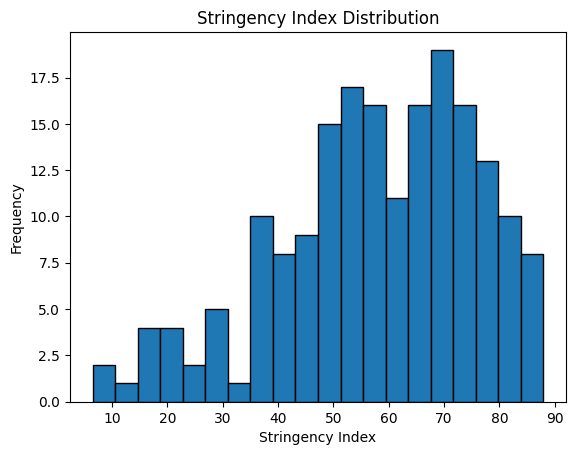

In [5]:
plt.hist(covid_df['stringency_index'], bins=20, edgecolor='black')
plt.xlabel('Stringency Index')
plt.ylabel('Frequency')
plt.title("Stringency Index Distribution")
plt.show()

Define Thresholds Using Quantiles

In [7]:
quantiles = covid_df['stringency_index'].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

In [8]:
print(f"Low threshold: {low_threshold}")
print(f"High threshold: {high_threshold}")

Low threshold: 51.85
High threshold: 67.59


Apply Categorization

In [9]:
def categorize_stringency(index):
    if index <= low_threshold:
        return 'Low'
    elif index <= high_threshold:
        return 'Medium'
    else:
        return 'High'

In [10]:
covid_df['stringency_category'] = covid_df['stringency_index'].apply(categorize_stringency)

In [11]:
covid_df.to_csv("covid19_data.csv", index=False)